In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load data for 2014-2023 and add year as a column

data_dir = 'data/FARS{}NationalCSV/'
years = range(2014, 2024)
data_frames = []

for year in years:
	file_path = os.path.join(data_dir.format(year), f'distract.csv')
	df = pd.read_csv(file_path)
	df['YEAR'] = year
	data_frames.append(df)
	# for 2014-2019, DRDISTRACT is defined as MDRDSTRD in distract.csv
	# for 2020-2023, DRDISTRACT is defined as DRDISTRACT in distract.csv
	df['DRDISTRACT'] = df['MDRDSTRD'] if year < 2020 else df['DRDISTRACT']


df_all = pd.concat(data_frames, ignore_index=True)

# keep only relevant columns
df_all = df_all[['STATE', 'ST_CASE', 'DRDISTRACT', 'YEAR']]
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539918 entries, 0 to 539917
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   STATE       539918 non-null  int64
 1   ST_CASE     539918 non-null  int64
 2   DRDISTRACT  539918 non-null  int64
 3   YEAR        539918 non-null  int64
dtypes: int64(4)
memory usage: 16.5 MB


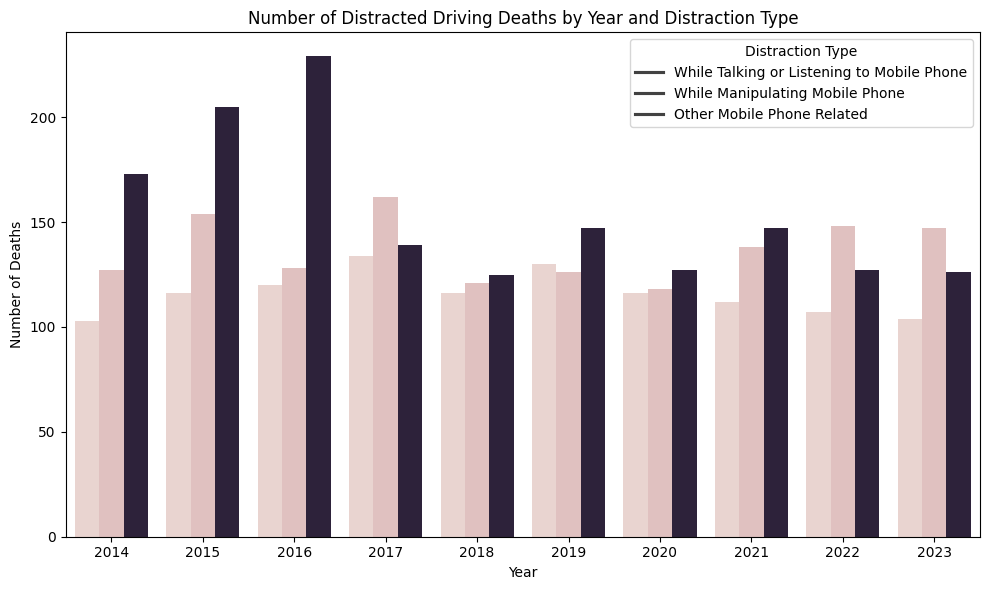

In [44]:
# sort by DRDISTRACT and count the number of occurrences of each DRDISTRACT
# for each year and plot the results in sorted order as a bar chart

cell_phone_codes = {
	5: 'While Talking or Listening to Mobile Phone',
	6: 'While Manipulating Mobile Phone',
	15: 'Other Mobile Phone Related'
}

df_all = df_all[df_all['DRDISTRACT'].isin(cell_phone_codes.keys())]

df_counts = df_all.groupby(['YEAR', 'DRDISTRACT']).size().reset_index(name='counts')
df_counts = df_counts.sort_values(by=['YEAR', 'DRDISTRACT'])
plt.figure(figsize=(10, 6))
sns.barplot(data=df_counts, x='YEAR', y='counts', hue='DRDISTRACT')
plt.title('Number of Distracted Driving Deaths by Year and Distraction Type')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Distraction Type', labels=cell_phone_codes.values())
plt.tight_layout()
plt.show()